# Ejercicio 2: Filtrado de señales

## Introducción


Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) en función del tiempo correspondiente a la actividad eléctrica del corazón. Cada etapa del ciclo cardíaco es representado por una letra: **P, Q, R, S y T**. La siguiente figura muestra un esquema de un ECG con dos pulsos.

<img src="cardio.png" width="600">


El ECG se usa para hacer diagnósticos y en particular para analizar la existencia de anormalidades en el ciclo cardiaco. La **frecuencia cardiaca**, es decir el inverso del intervalo RR, de un humano normal en reposo está en el rango de **60 y 100 latidos por minuto**



## Enunciado

El hospital base de Valdivia tiene un electrocardiógrafo que mide la ECG en miliVolts [mV] a una frecuencia de muestreo de $360$ [Hz]

Durante el proceso de captura ciertos errores provocaron que la señal se contamine con 

- **(A)** Un ruido asociado al sistema eléctrico
- **(B)** Un ruido de baja frecuencia causado por un desperfecto del sensor
- **(C)** Un ruido blanco de origen térmico 

Esto complica el análisis del médico por lo que el hospital base los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

<IPython.core.display.Javascript object>


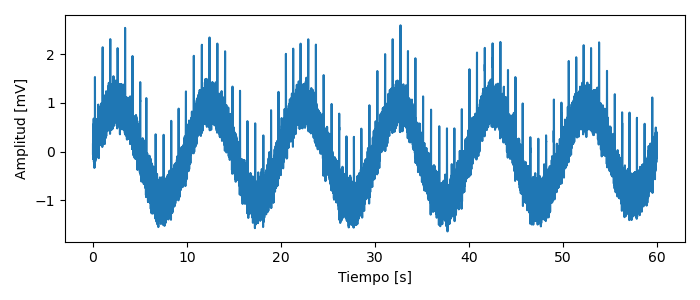

In [1]:
import numpy as np
import pickle
import scipy.fft as sfft
import scipy.signal

%matplotlib notebook
import matplotlib.pylab as plt

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)

Fs = 360
time = np.arange(len(data))/Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

## Análisis (15%)

- Observe los primeros dos segundos de la señal, compare con el esquema mostrado en la introducción y discuta sobre los efectos causados por los ruidos **A**, **B** y **C** mencionados en el enunciado. Además responda  ¿Qué es un ruido blanco y que tipo de efecto introduce en la señal y en su espectro? ¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro? 
- Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia y su espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases
- En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?


<IPython.core.display.Javascript object>


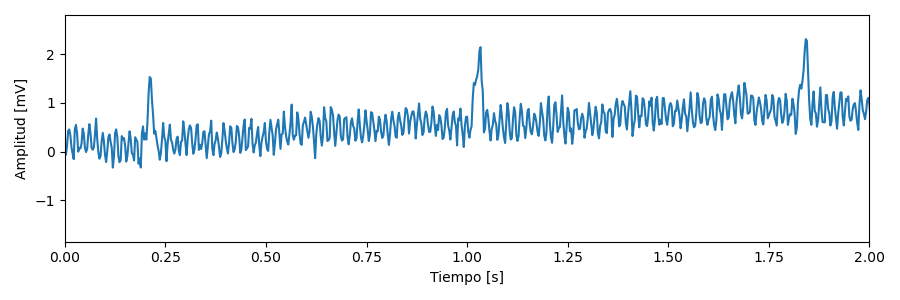

In [2]:
fig, ax = plt.subplots(figsize=(9, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_xlim([0, 2])
ax.set_ylabel('Amplitud [mV]');

Algunos efectos causados por los ruidos A, B y C:
- El ruido A es el que agrega la cantidad elevada de 'picos' aleatorios con distintas amplitudes a lo largo de la señal. Hace practicamente imposible observar los distintos intervalos del esquema.
- El ruido B es el que provoca la tendencia de forma sinusoidal de la señal y no plana como se muestra en el diagrama.
- El ruido C es el que provoca el efecto de 'grosor' de la señal. Nuevamente, dificulta observar los distintos intervalos del ciclo cardiaco.

Características del ruido blanco:
- Es un ruido aleatorio que no tiene ninguna correlación, contiene todas las frecuencias y su densidad espectral es constante. El efecto que introduce en la señal visualmente es el 'grosor'.

Características de una tendencia:
- Es la forma que le da a la señal, ésta va a tener la tendencia de ir en cierta dirección. En este caso, hace que la señal tenga una forma sinosoidal.

<IPython.core.display.Javascript object>


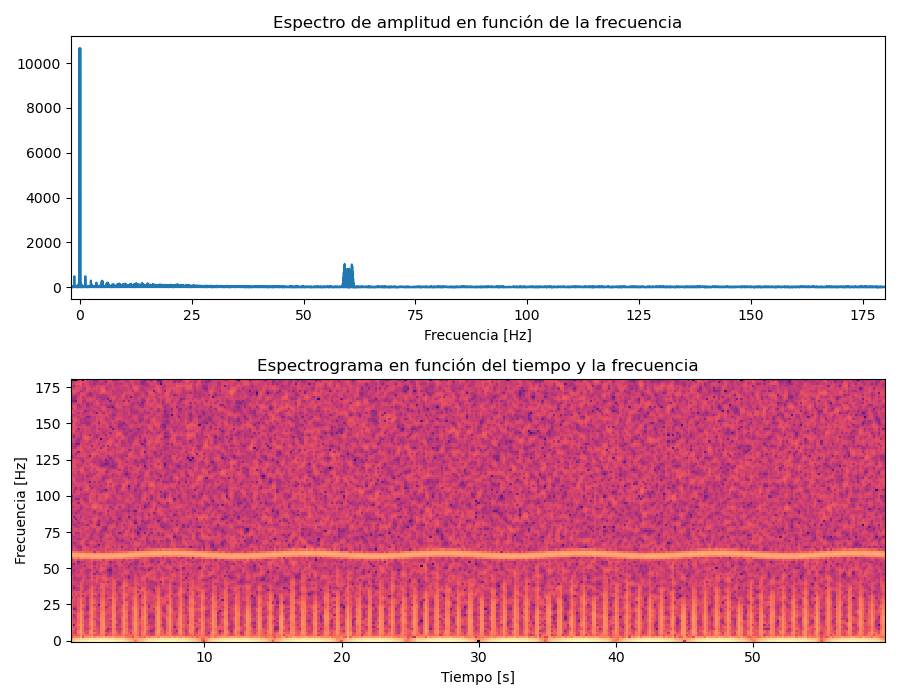

In [3]:
#transformada de fourier
SA = np.absolute(sfft.fft(data))
f = sfft.fftfreq(len(data), d=1/Fs)

#espectrograma
ventana = 'blackman'
largo_ventana = 256
traslape = largo_ventana//1.3
freq, ttime, Sxx = scipy.signal.spectrogram(data, fs=Fs,window=ventana, 
                                            nperseg=largo_ventana, noverlap=traslape, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')

plt.close('all')
fig, ax = plt.subplots(2, figsize=(9, 7), tight_layout=True)

#Graficamos el espectro de amplitud vs frecuencia
ax[0].set_title("Espectro de amplitud en función de la frecuencia")
ax[0].set_xlabel('Frecuencia [Hz]')
ax[0].plot(f, SA)
ax[0].set_xlim(-2, 180)

#Graficamos el espectrograma
ax[1].set_title("Espectrograma en función del tiempo y la frecuencia")
ax[1].set_xlabel("Tiempo [s]")
ax[1].set_ylabel('Frecuencia [Hz]')
#np.log10 para visualizar mejor
ax[1].pcolormesh(ttime, freq, np.log10(Sxx), cmap=plt.cm.magma, shading='auto');

Considerando que el rango de frecuencias de los ruidos que estamos estudiando están separadas (a excepción del ruido C blanco), se decidió utilizar la ventana de Blackman para así suprimir más los lóbulos laterales.

Después de probar distintas configuraciones, se llegó a un largo de ventana de 256 muestras y un traslape cercano al largo de ventana de 196, para así mejorar la resolución temporal y poder visualizar mejor la frecuencia cardiaca, a cambio del tradeoff de tener una resolución frecuencial peor.
- Tipo de ventana: Blackman
- Largo de ventana: 256
- Traslape: 256//1.3 = 196

En base a la gráfica de espectro de amplitud vs frecuencia, observamos distintos rangos de frecuencias:
- El ruido A es el ruido que se encuentra entre el rango de frecuencias 57 y 62 [Hz]. Tiene una amplitud media.
- El ruido B es el que se encuentra con una frecuencia cercana a 0. Tiene una amplitud alta.
- El ruido C es el piso que se observa a lo largo de toda la gráfica. Tiene una amplitud baja.
- La frecuencias del ritmo cardiaco están en un rango aproximado de 1 y 50 [Hz].

En base al espectrograma:
- A ruido asociado al sistema eléctrico: se observa que oscila en un rango de frecuencias aproximadamente entre 57 y 62 [Hz].
- B ruido de baja frecuencia causado por el desperfecto del sensor: se observa un rango de frecuencias aproximado entre 0 y 1 [Hz].
- C ruido blanco de origen térmico: se encuentra en todo el espectrograma pero podemos reducir gran parte de él acotándolo a un rango aproximado de frecuencias entre 62 y 180 [Hz].

Observando el espectrograma, esperamos encontrar la señal de ritmo cardíaco de un humano normal en reposo entre 1 y 50 [Hz] aproximadamente.

## Filtrado FIR (50%)

Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`. 

Luego use este método para diseñar y aplicar tres filtros sobre la señal de entrada. El primero debe filtrar el ruido **(A)**, el segundo el ruido **(B)** y el tercero el ruido **(C)**. Indique la(s) frecuencia(s) de corte y el tipo de filtro en cada caso. Justifique su elección en base a sus observaciones en el paso anterior.

Considere una ventana de Hamming y $1001$ coeficientes para el filtro

Por cada filtro:
- Muestre la respuesta al impulso y la respuesta en frecuencia resultantes
- Filtre la señal convolucionando con la respuesta al impulso
- Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso? Luego muestre gráficamente el espectro de magnitud y el espectrograma de la señal restada. En base a lo que observa y a los gráficos del punto anterior discuta sobre la efectividad del filtro

Finalmente
- Filtre la señal convolucionando con los tres filtros. Muestre el resultado graficamente. 
- Muestre un acercamiento de los primeros tres segundos de la señal filtrada, reconozca la fase R y márquela con una linea roja punteada.
- Cree una función que mida el tiempo RR en la señal filtrada. Grafique la frecuencia cardiaca en función del tiempo. ¿Se encuentra la persona en el rango sano o no?

In [4]:
#scipy.signal.firwin?

Los filtros FIR son filtros digitales con una respuesta finita al impulso. Basan su salida en entradas presentes/pasadas y no son recursivos.

El método de enventanado consiste en los siguientes pasos:
1. Especificar una respuesta en frecuencia ideal $H_d[k]$
2. Usar la transformada de Fourier inversa para obtener la respuesta al impulso ideal $h_d[n]$
3. Truncar la respuesta al impulso ideal usando una ventana tal que $h[n]=h_d[n]w[n]$
4. $h[n]$ nos da los coeficientes y $w[n]$ nos da el largo del filtro.

Argumentos y valor de retorno que vamos a utilizar de la función scipy.signal.firwin:
- numtaps : largo del filtro.
- cutoff : frecuencia/frecuencias de corte.
- window : tipo de ventana.
- pass_zero : True si queremos dejar pasar el 0, False si no. También podemos especificar el tipo de banda: 'bandpass', 'lowpass', 'highpass' o 'bandstop'.
- fs : frecuencia de muestreo de la señal.

Valor de retorno
- h : coeficientes del filtro FIR.

Utilizando los rangos de frecuencias obtenidos anteriormente, creamos los filtros FIR en base a los siguientes datos:

- Filtro A: el ruido A se encuentra oscilando en medio de otras frecuencias, por lo que utilizaremos un filtro que rechache dicho rango de frecuencia.
 - Frecuencias de corte: 57 y 62 [Hz]
 - Tipo de filtro: 'bandstop' (filtro rechaza banda).


- Filtro B: el ruido B tiene una frecuencia baja por lo que usamos un filtro pasa alto para filtrar todas las frecuencias menores a 1 [Hz].
 - Frecuencia de corte: 1 [Hz]
 - Tipo de filtro: 'highpass' (filtro pasa alto).


- Filtro C: si bien, el ruido C se encuentra en todo el espectrograma, podemos reducir gran parte de este ruido acotándolo hasta la frecuencia del ruido A usando un filtro pasa bajo y así filtrar todas las frecuencias mayores a 62 [Hz].
 - Frecuencia de corte: 62 [Hz]
 - Tipo de filtro: 'lowpass' (filtro pasa bajo).

<IPython.core.display.Javascript object>


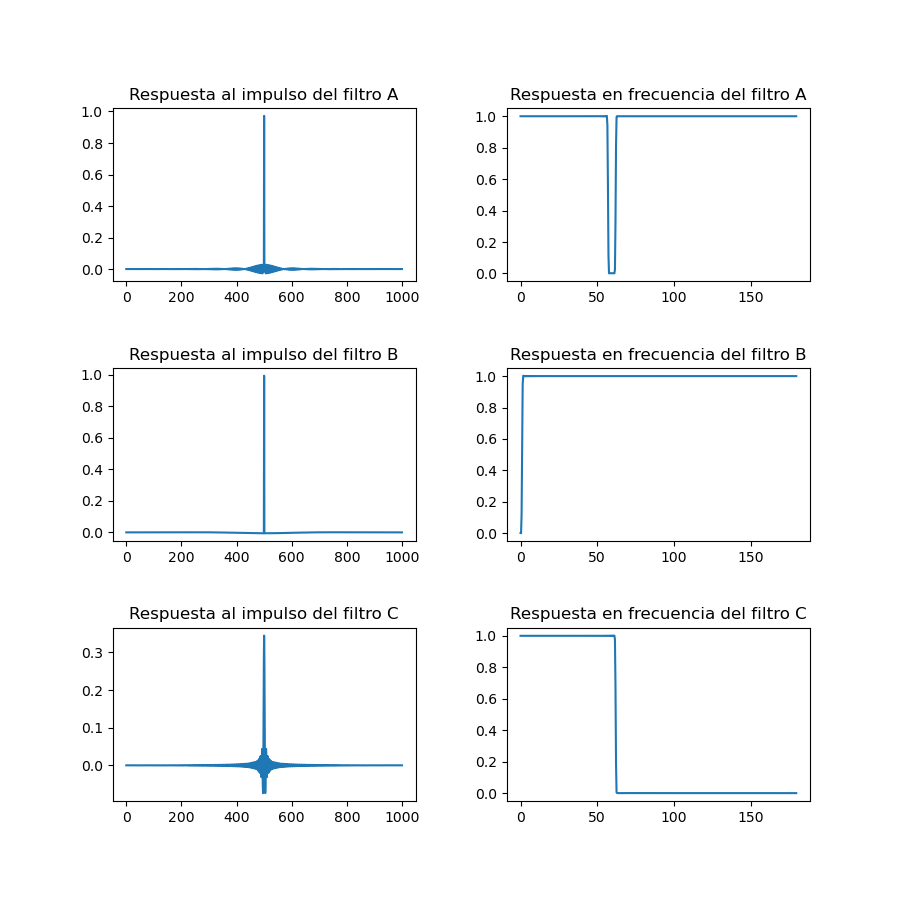

In [5]:
#(A) Un ruido asociado al sistema eléctrico, frecuencias de corte = [57 , 62], filtro rechaza banda
A_h = scipy.signal.firwin(numtaps=1001, cutoff=[57, 62], 
                        pass_zero='bandstop', window='hamming',
                        fs=Fs)

#(B) Un ruido de baja frecuencia causado por un desperfecto del sensor, frecuencia de corte = 1, filtro pasa alto
B_h = scipy.signal.firwin(numtaps=1001, cutoff=[1],
                        pass_zero='highpass', window='hamming',
                        fs=Fs)

#(C) Un ruido blanco de origen térmico, frecuencia de corte = 62, filtro pasa bajo
C_h = scipy.signal.firwin(numtaps=1001, cutoff=[62], 
                        pass_zero='lowpass', window='hamming',
                        fs=Fs)

A_freq, A_H = scipy.signal.freqz(A_h, fs=Fs)
B_freq, B_H = scipy.signal.freqz(B_h, fs=Fs)
C_freq, C_H = scipy.signal.freqz(C_h, fs=Fs)

plt.close('all')
fig, ax = plt.subplots(3,2, figsize=(9, 9))

#Para el filtro A
ax[0][0].set_title("Respuesta al impulso del filtro A")
ax[0][0].plot(A_h)
ax[0][1].set_title("Respuesta en frecuencia del filtro A")
ax[0][1].plot(A_freq, np.absolute(A_H))

#Para el filtro B
ax[1][0].set_title("Respuesta al impulso del filtro B")
ax[1][0].plot(B_h)
ax[1][1].set_title("Respuesta en frecuencia del filtro B")
ax[1][1].plot(B_freq, np.absolute(B_H))

#Para el filtro C
ax[2][0].set_title("Respuesta al impulso del filtro C")
ax[2][0].plot(C_h)
ax[2][1].set_title("Respuesta en frecuencia del filtro C")
ax[2][1].plot(C_freq, np.absolute(C_H))

plt.subplots_adjust(hspace= 0.5)
plt.subplots_adjust(wspace= 0.3);

Al realizar la resta entre la señal original y la señal filtrada, se espera observar únicamente las frecuencias que estamos filtrando para cada ruido. Para A se espera observar una señal con un rango de frecuencias entre 57 y 62 [Hz]. Para B, una señal con frecuencias menores a 1 [Hz]. Para C se observa la señal (ruido blanco) con frecuencias mayores a 62 [Hz].

Señal convolucionada con:
- el filtro A = [0.23533827 0.07896124 0.16961393 ... 0.31889764 0.15050983 0.06688164]
- el filtro B = [ 0.05743853 -0.15737106  0.01860093 ...  0.37903335  0.28936404
  0.14091378]
- el filtro C = [-0.07349803  0.00813716  0.22492507 ...  0.25735783  0.34449197
  0.25973527]

Señal restada con:
- el filtro A = [-0.08670174 -0.14390983 -0.05738486 ...  0.06441879  0.14361637
  0.07926645]
- el filtro B = [0.091198   0.09242248 0.09362813 ... 0.00428308 0.00476217 0.00523431]
- el filtro C = [ 0.22213456 -0.07308574 -0.112696   ...  0.1259586  -0.05036576
 -0.11358718]


<IPython.core.display.Javascript object>


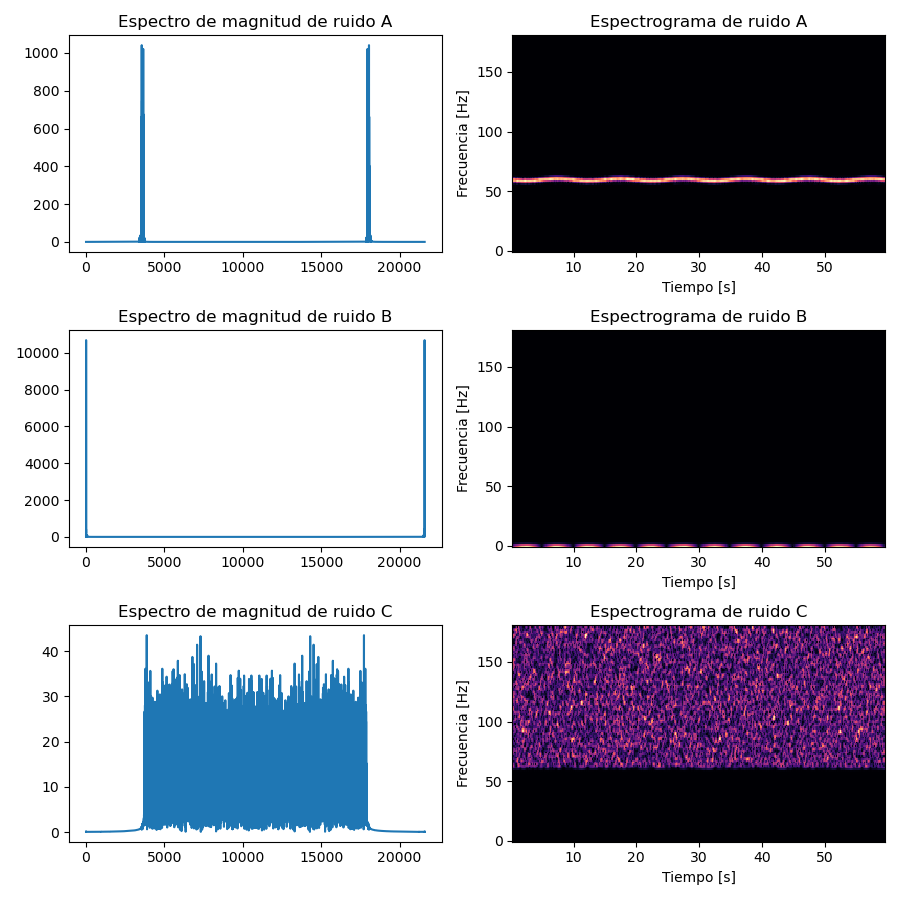

In [6]:
#Filtramos la señal convolucionando con la respuesta al impulso obtenidas para A, B y C
#Usamos mode='same' para que las señales resultantes tengan el mismo tamaño que la señal original y podamos restarlas.
A_conv = scipy.signal.convolve(data, A_h, mode='same')
B_conv = scipy.signal.convolve(data, B_h, mode='same')
C_conv = scipy.signal.convolve(data, C_h, mode='same')
print("Señal convolucionada con:")
print("- el filtro A =", A_conv)
print("- el filtro B =", B_conv)
print("- el filtro C =", C_conv)

print()

#Calculamos la resta entre la señal original y la señal filtrada
A_data = data - A_conv
B_data = data - B_conv
C_data = data - C_conv
print("Señal restada con:")
print("- el filtro A =", A_data)
print("- el filtro B =", B_data)
print("- el filtro C =", C_data)

#Espectrogramas para A, B y C
A_freq, A_ttime, A_Sxx = scipy.signal.spectrogram(A_data, fs=Fs,window=ventana, 
                                            nperseg=largo_ventana, noverlap=traslape, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')
B_freq, B_ttime, B_Sxx = scipy.signal.spectrogram(B_data, fs=Fs,window=ventana, 
                                            nperseg=largo_ventana, noverlap=traslape, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')
C_freq, C_ttime, C_Sxx = scipy.signal.spectrogram(C_data, fs=Fs,window=ventana, 
                                            nperseg=largo_ventana, noverlap=traslape, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')

plt.close('all')
fig, ax = plt.subplots(3,2, figsize=(9, 9), tight_layout=True)

#--------------Para el filtro A -----------------------------------------------------------------------------
ax[0][0].set_title("Espectro de magnitud de ruido A")
ax[0][0].plot(np.absolute(sfft.fft(A_data)))

ax[0][1].set_title("Espectrograma de ruido A")
ax[0][1].set_xlabel("Tiempo [s]")
ax[0][1].set_ylabel('Frecuencia [Hz]')
ax[0][1].pcolormesh(A_ttime, A_freq, A_Sxx, cmap=plt.cm.magma, shading='auto')

#--------------Para el filtro B -----------------------------------------------------------------------------
ax[1][0].set_title("Espectro de magnitud de ruido B")
ax[1][0].plot(np.absolute(sfft.fft(B_data)))

ax[1][1].set_title("Espectrograma de ruido B")
ax[1][1].set_xlabel("Tiempo [s]")
ax[1][1].set_ylabel('Frecuencia [Hz]')
ax[1][1].pcolormesh(B_ttime, B_freq, B_Sxx, cmap=plt.cm.magma, shading='auto')

#--------------Para el filtro C -----------------------------------------------------------------------------
ax[2][0].set_title("Espectro de magnitud de ruido C")
ax[2][0].plot(np.absolute(sfft.fft(C_data)))

ax[2][1].set_title("Espectrograma de ruido C")
ax[2][1].set_xlabel("Tiempo [s]")
ax[2][1].set_ylabel('Frecuencia [Hz]')
ax[2][1].pcolormesh(C_ttime, C_freq, C_Sxx, cmap=plt.cm.magma, shading='auto')

plt.subplots_adjust(hspace= 0.6)
plt.subplots_adjust(wspace= 0.3);

Para el caso del ruido A y B si resultó ser efectivo ya que filtramos casi todas las frecuencias de dichos ruidos. Por otro lado, no es tan efectivo con el ruido C ya que solo filtramos una parte de éste. Sabemos que es casi imposible eliminar por completo el ruido blanco por lo que el resultado es lo esperado.

<IPython.core.display.Javascript object>


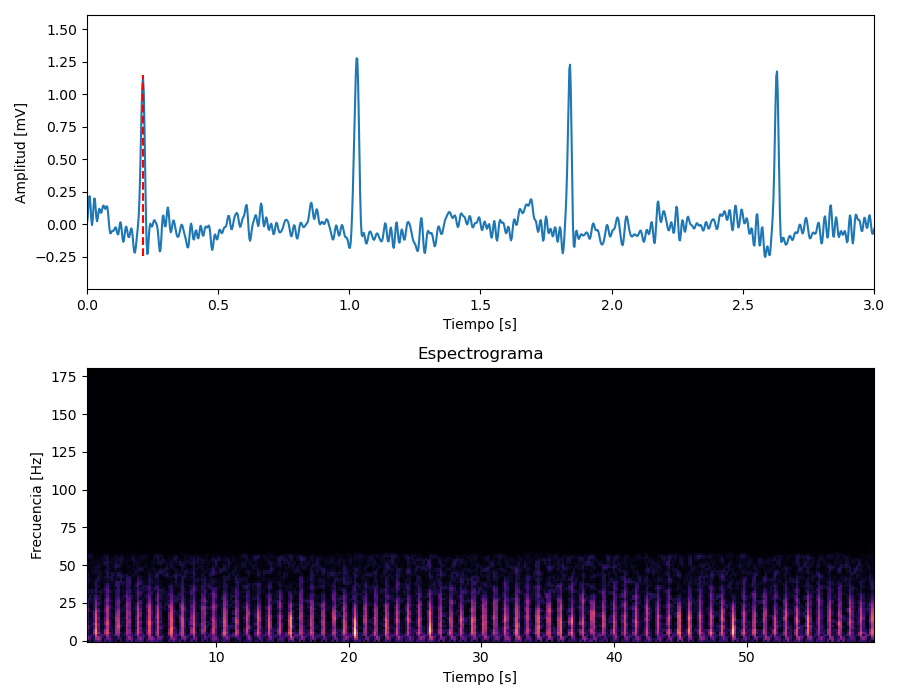

In [11]:
#Filtramos la señal convolucionando con los 3 filtros
A_conv = scipy.signal.convolve(data, A_h, mode='same')
B_conv = scipy.signal.convolve(A_conv, B_h, mode='same')
C_conv = scipy.signal.convolve(B_conv, C_h, mode='same')

data_FIR = C_conv

FIR_freq, FIR_ttime, FIR_Sxx = scipy.signal.spectrogram(data_FIR, fs=Fs,window=ventana, 
                                            nperseg=largo_ventana, noverlap=traslape, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')

plt.close('all')
fig, ax = plt.subplots(2, figsize=(9, 7), tight_layout=True)

ax[0].plot(time, data_FIR)
ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Amplitud [mV]')
ax[0].set_xlim([0, 3])

#línea punteada para R
ax[0].axvline(x=0.215, ymin=0.12, ymax=0.78, c='r',ls='--')

ax[1].set_title("Espectrograma")
ax[1].set_xlabel("Tiempo [s]")
ax[1].set_ylabel('Frecuencia [Hz]')
ax[1].pcolormesh(FIR_ttime, FIR_freq, FIR_Sxx, cmap=plt.cm.magma, shading='auto');
#ax[1].set_xlim([0, 3]);

0.8138888888888889 segundos por intervalo RR.


<IPython.core.display.Javascript object>


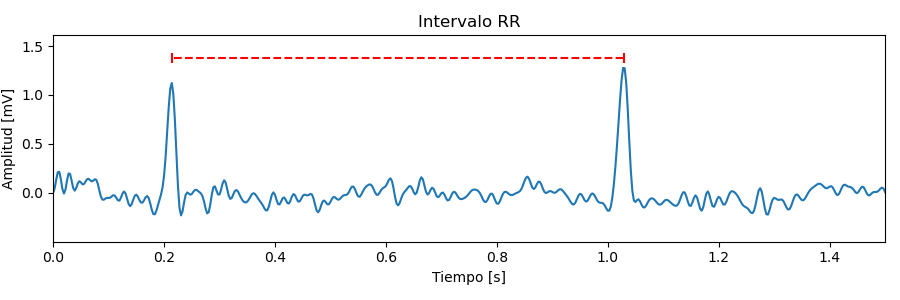

In [12]:
def RR(x, t):
    t_inicial1 = 0
    t_final1 = int(t.size*0.5//60)
    
    t_inicial2 = int(t.size*0.5//60)
    t_final2 = int(t.size*1.5//60)
    
    amp_max1 = x[0]
    index1 = 0
    
    amp_max2 = x[0]
    index2 = 0
    
    for i in range(t_inicial1, t_final1):
        if(amp_max1 < x[i]):
            amp_max1 = x[i]
            index1 = i
            
            
    for i in range(t_inicial2, t_final2):
        if(amp_max2 < x[i]):
            amp_max2 = x[i]
            index2 = i
    
    index = index2 - index1
    t_total = time[index]
    
    return t_total

#llamamos a la función creada para calcular el tiempo del intervalo RR
t_total = RR(data_FIR, time)
print(t_total, 'segundos por intervalo RR.')

plt.close('all');
fig, ax = plt.subplots(figsize=(9, 3), tight_layout=True)

#graficamos
ax.plot(time, data_FIR)
ax.set_title("Intervalo RR")
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]')
ax.set_xlim([0, 1.5])

#línea punteada con el intervalo RR
ax.axhline(y=1.38, xmin=0.145, xmax=0.688, c='r',ls='--')
ax.axvline(x=0.214, ymin=0.87, ymax=0.91, c='r',ls='-')
ax.axvline(x=1.03, ymin=0.87, ymax=0.91, c='r',ls='-');

Sabemos que el corazón de una persona normal en reposo late entre 60 y 100 veces por minuto, en otras palabras, late en un rango de [1, 1.67] veces por segundo.

En nuestro análisis, observamos que el intervalo RR del paciente se cumple cada 0.814 segundos, esto puede expresarse como que su corazón late 1 vez cada 0.8139 segundos, o, en otras palabras, late 1/0.814 ≈ 1.2287 veces por segundo.

Así, observamos que 1.2287 está dentro del rango de una persona normal en reposo, por lo que podemos decir que el paciente se encuentra en el rango sano.

## Filtrado IIR (35%)

Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función `scipy.signal.iirfilter`.

Luego use este método para diseñar tres filtros. Los filtros deben cumplir el mismo propósito que en el caso anterior. Considere filtros IIR de tipo `butterworth` y todos del mismo orden. Aplique los filtros sobre la señal de entrada usando la función `scipy.signal.lfilter`.

El objetivo es encontrar el mínimo orden para los filtros IIR tal que el error medio cuadrático entre la señal filtrada IIR y la señal filtrada FIR sea menor que un 1% de la varianza de la señal filtrada FIR. Es decir que si $x$ es la señal filtrada IIR e $y$ es la señal filtrada FIR donde $N = \min(\text{len}(x), \text{len}(y))$ se cumpla que

$$
\sum_{i=1}^N (x_i - y_i)^2 < 0.01 \sum_{i=1}^N (y_i - \bar y_i)^2
$$

Finalmente, discuta sobre sus hallazgos muestre gráficamente el resultado del mejor filtro IIR


In [13]:
#scipy.signal.iirfilter?

Los filtros IIR son filtros digitales con una respuesta infinita al impulso. Incluyen versiones pasadas de la salida en instantes anteriores, haciendo uso de la recursividad, mientras que los filtros FIR sólo se basan en salidas presentes/pasadas y no son recursivos.

Argumentos y valor de retorno que vamos a utilizar de la función scipy.signal.iirfilter:

- N : orden del filtro.

- Wn : una frecuencia de corte en el caso de filtros 'pasa alto'/'pasa bajo' o 2 frecuencias de corte en el caso de filtros 'pasa banda'/'rechaza banda'.

- btype : tipo de banda: 'bandpass', 'lowpass', 'highpass' o 'bandstop'.

- ftype : tipo del filtro IIR. En este caso vamos a usar butterworth.

- fs : frecuencia de muestreo de la señal.

Valores de retorno:
- b: coeficientes del numerador.
- a: coeficientes del denominador.

In [108]:
#Orden del filtro IIR
orden_N = 3;

#(A) Un ruido asociado al sistema eléctrico, frecuencias de corte = [57 , 62], filtro rechaza banda
A_b, A_a = scipy.signal.iirfilter(N=orden_N, Wn=[57, 62], fs=Fs, ftype='butterworth', btype='bandstop')

#(B) Un ruido de baja frecuencia causado por un desperfecto del sensor, frecuencia de corte = 1, filtro pasa alto
B_b, B_a = scipy.signal.iirfilter(N=orden_N, Wn=1, fs=Fs, ftype='butterworth', btype='highpass')

#(C) Un ruido blanco de origen térmico, frecuencia de corte = 62, filtro pasa bajo
C_b, C_a = scipy.signal.iirfilter(N=orden_N, Wn=62, fs=Fs, ftype='butterworth', btype='lowpass')

#Filtramos la señal usando los 3 filtros
A_y = scipy.signal.lfilter(A_b, A_a, data)
B_y = scipy.signal.lfilter(B_b, B_a, A_y)
C_y = scipy.signal.lfilter(C_b, C_a, B_y)

data_IIR = C_y;

In [109]:
#data_IIR = señal filtrada con filtro IIR = x
#data_FIR = señal filtrada con filtro FIR = y

def orden_min(x, y):
    sum1 = 0
    sum2 = 0
    N = min(len(x), len(y))
    
    #---- sumatoria 1 ----
    for i in range (1, N):
        sum1 = sum1 + (x[i] - y[i])**2

    #---sumatoria 2 ----
    for i in range (1, N):
        y_b = y[0:i];
        sum2 = sum2 + (y[i] - np.mean(y_b))**2
        
    #y_b = np.mean(y);  
    #for i in range (1, N):
        #sum2 = sum2 + (y[i] - y_b)**2; 
            
    #print(sum1, 0.01*sum2)
    #print(sum1/sum2)
    
    if (sum1 < 0.01*sum2):
        print("Se cumple.")

orden_min(data_IIR, data_FIR);
print('Se llegó a que el orden óptimo para el filtro IIR es N = %i ya que tiene menor error cuadrático con respecto al filtro FIR. '%orden_N)

Se llegó a que el orden óptimo para el filtro IIR es N = 3 ya que tiene menor error cuadrático con respecto al filtro FIR. 


<IPython.core.display.Javascript object>


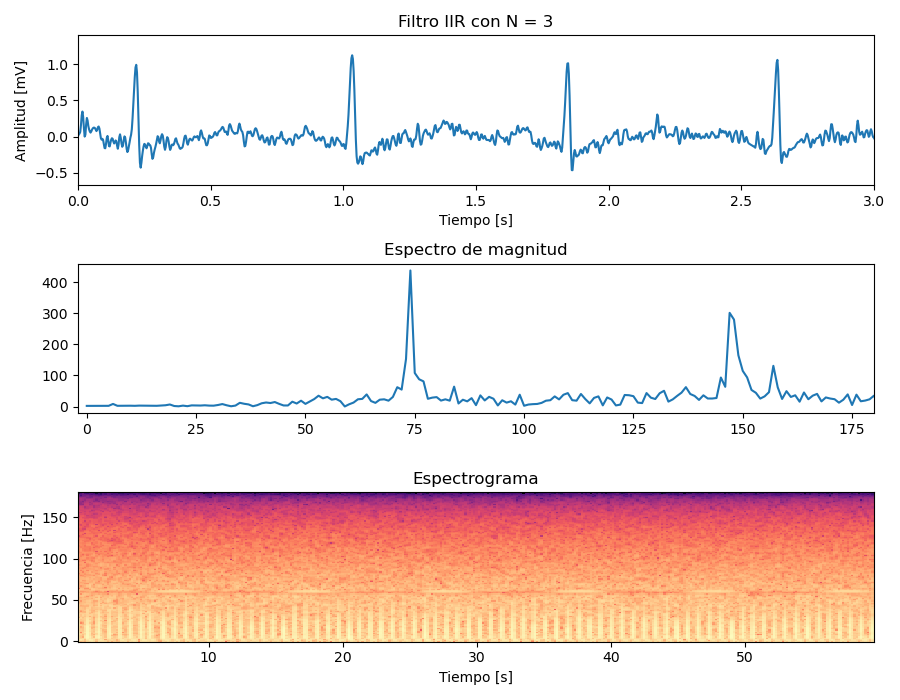

In [110]:
IIR_freq, IIR_ttime, IIR_Sxx = scipy.signal.spectrogram(data_IIR, fs=Fs,window=ventana, 
                                            nperseg=largo_ventana, noverlap=traslape, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')

plt.close('all')
fig, ax = plt.subplots(3, figsize=(9, 7), tight_layout=True)

ax[0].plot(time, data_IIR)
ax[0].set_title('Filtro IIR con N = %i'%orden_N)
ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Amplitud [mV]')
ax[0].set_xlim([0, 3])

ax[1].set_title("Espectro de magnitud")
ax[1].plot(np.absolute(sfft.fft(data_IIR)))
ax[1].set_xlim([-2, 180])

ax[2].set_title("Espectrograma")
ax[2].set_xlabel("Tiempo [s]")
ax[2].set_ylabel('Frecuencia [Hz]')
ax[2].pcolormesh(IIR_ttime, IIR_freq, np.log10(IIR_Sxx), cmap=plt.cm.magma, shading='auto');